In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math

bits = np.random.randint(2, size=64)

def conv_sp(bits, p):                      #converte serial para paralelo
  return np.reshape(bits,(-1, p))

In [ ]:
bits_map = np.array([
    [0, 1, 3, 2, ],
    [4, 5, 7, 6],
    [12, 13, 15, 14],
    [8, 9, 11, 10]
])
table = np.array([
            [[-3,3],[-1,3],[1,3],[3,3]],      
            [[-3,1],[-1,1],[1,1],[3,1]],
            [[-3,-1],[-1,-1],[1,-1],[3,-1]],
            [[-3,-3],[-1,-3],[1,-3],[3,-3]]            
  ])

-1 3
3 -3
3 3
-1 -1
-1 -3
1 -1
3 -3
-1 1
3 -1
1 -1
1 3
-1 3
-1 -3
-1 3
-1 3
-3 -1


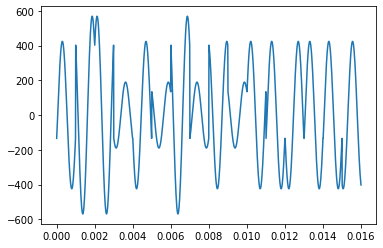

In [ ]:
e=9
ts=1e-3
m=16
fc=1e3

t=np.linspace(0,ts,100)

phi_1=np.sqrt(2/ts)*np.cos(2*np.pi*fc*t)
phi_2=np.sqrt(2/ts)*np.sin(2*np.pi*fc*t)

signal = conv_sp(bits,int(np.log2(m)))

#print(signal)

s = np.array([])
for x in range(signal.shape[0]):
  bit_value = np.right_shift(np.packbits(signal[x]),4)
  #print(bit_value)
  i,j = np.where(bits_map==bit_value)
  a,b = table[int(i)][int(j)]
  print(a,b)
  si,sq = a*np.sqrt(e)*phi_1,b*np.sqrt(e)*phi_2
  s = np.append(s,si+sq)
tempo = np.linspace(0,ts*signal.shape[0],s.size)
plt.plot(tempo, s)

In [ ]:
a1 = s* np.sqrt(2/ts)*np.cos(2*np.pi*fc*tempo)
a2 = s* np.sqrt(2/ts)*np.sin(2*np.pi*fc*tempo)
x1 = np.array([]);
x2 = np.array([]);

from scipy.integrate import simps

for x in range(signal.shape[0]):
  x1 = np.append(x1, simps(a1[t.size*x:t.size*(x+1)],t));
  x2 = np.append(x2, simps(a2[t.size*x:t.size*(x+1)],t));

matrix_a=np.array([
    [-3, -1, 1, 3],
     [-3, -1, 1, 3],
      [-3, -1, 1, 3],
       [-3, -1, 1, 3]
])

matrix_b=np.array([
    [3, 3, 3, 3],
     [1, 1, 1,1],
      [-1, -1, 1, -1],
       [-3, -3, -3, -3]
])


bits_r = np.array([],dtype=int)
for x,y in zip(x1,x2):
  matrix_r = abs(x-np.sqrt(e)*matrix_a) + abs(y - np.sqrt(e)*matrix_b)
  #print(matrix_r)
  i = np.argmin(matrix_r)//4
  #print(i)
  j = np.argmin(matrix_r)%4
  #print(j)
  bitseq = np.unpackbits(np.array([bits_map[i][j]], dtype=np.uint8))
  bits_r = np.append(bits_r, bitseq)

bits_r = np.reshape(bits_r, (16,8))
bits_r = bits_r[:,4:]

print("bits enviados == bits recebidos", np.equal(bits_r,signal))
print(signal)
print(bits_r)

bits enviados == bits recebidos [[ True  True  True  True]
 [ True  True  True  True]
 [ True  True  True  True]
 [ True  True  True  True]
 [ True  True  True  True]
 [ True  True False  True]
 [ True  True  True  True]
 [ True  True  True  True]
 [ True  True  True  True]
 [False  True  True  True]
 [ True  True  True  True]
 [ True  True  True  True]
 [ True  True  True  True]
 [ True  True  True  True]
 [ True  True  True  True]
 [ True  True  True  True]]
[[0 0 0 1]
 [1 0 1 0]
 [0 0 1 0]
 [1 1 0 1]
 [1 0 0 1]
 [1 1 1 1]
 [1 0 1 0]
 [0 1 0 1]
 [1 1 1 0]
 [1 1 1 1]
 [0 0 1 1]
 [0 0 0 1]
 [1 0 0 1]
 [0 0 0 1]
 [0 0 0 1]
 [1 1 0 0]]
[[0 0 0 1]
 [1 0 1 0]
 [0 0 1 0]
 [1 1 0 1]
 [1 0 0 1]
 [1 1 0 1]
 [1 0 1 0]
 [0 1 0 1]
 [1 1 1 0]
 [0 1 1 1]
 [0 0 1 1]
 [0 0 0 1]
 [1 0 0 1]
 [0 0 0 1]
 [0 0 0 1]
 [1 1 0 0]]
